In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf

2025-01-29 22:11:26.942070: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-29 22:11:26.954358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738176086.967799  226028 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738176086.971152  226028 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-29 22:11:26.983588: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
dataset1 = pd.read_csv('ptbdb_normal.csv', header=None)
dataset1.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
dataset2 = pd.read_csv('ptbdb_abnormal.csv', header=None)
dataset2.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
dataset = pd.concat([dataset1, dataset2])
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dataset_labels = dataset.pop(187)
dataset_labels = dataset_labels.astype(int)

dataset_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: 187, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set, train_set_labels, test_set_labels = train_test_split(dataset, dataset_labels, test_size=0.2, random_state=42)

/tmp/ipykernel_226028/3823188858.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='n', data=df, palette=['lightpink', 'purple', 'cyan', 'yellow', 'lightgreen'])
/tmp/ipykernel_226028/3823188858.py:10: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x='n', data=df, palette=['lightpink', 'purple', 'cyan', 'yellow', 'lightgreen'])


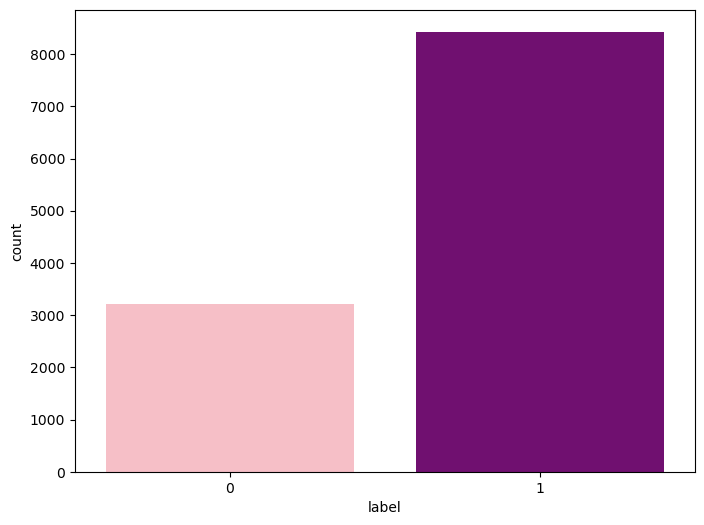

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = train_set_labels.copy()
df = pd.DataFrame(data)
df.columns = ['n']

plt.figure(figsize=(8, 6))
sns.countplot(x='n', data=df, palette=['lightpink', 'purple', 'cyan', 'yellow', 'lightgreen'])
plt.xlabel('label')
plt.ylabel('count')
plt.show()

In [8]:
from tensorflow.keras import layers, models

model = tf.keras.models.load_model('dataset1.keras')
model = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
new_output_layer = layers.Dense(1, activation='sigmoid',name='dense_out')(model.output)
new_model = tf.keras.Model(inputs=model.input, outputs=new_output_layer)

new_model.summary()

I0000 00:00:1738176090.744407  226028 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1136 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 187, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 187, 32)   │        192 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 93, 32)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 93, 64)    │      6,208 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 46, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 46, 64)    │      4,160 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 46, 64)    │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 46, 64)    │     66,368 │ add[0][0],        │
│ (MultiHeadAttentio… │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 46, 64)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 46, 64)    │          0 │ dropout_1[0][0],  │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 46, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 46, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 46, 64)    │      8,256 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 46, 64)    │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 46, 64)    │          0 │ dropout_2[0][0],  │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 46, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 46, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 46, 64)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 46, 64)    │          0 │ dropout_4[0][0],  │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 46, 64)    │        128 │ add_3[0][0]     

 Total params: 426,625 (1.63 MB)

 Trainable params: 426,625 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
new_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",  
    metrics=["accuracy"]
)

new_model.fit(train_set, train_set_labels, batch_size=64, epochs=5, validation_data=(test_set, test_set_labels))

Epoch 1/5


I0000 00:00:1738176098.199908  226154 service.cc:148] XLA service 0x72bd1000e440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738176098.199931  226154 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2025-01-29 22:11:38.448614: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738176099.487043  226154 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-29 22:11:41.771152: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43', 48 bytes spill stores, 48 bytes spill loads

2025-01-29 22:11:42.026682: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_145', 

 18/182 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5438 - loss: 0.7222

I0000 00:00:1738176110.870789  226154 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


179/182 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7568 - loss: 0.4540

2025-01-29 22:11:55.638822: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_145', 136 bytes spill stores, 136 bytes spill loads

2025-01-29 22:11:55.994224: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_145', 56 bytes spill stores, 56 bytes spill loads

2025-01-29 22:11:56.089958: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8', 12 bytes spill stores, 12 bytes spill loads

2025-01-29 22:11:56.338989: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8', 32 bytes spill stores, 32 bytes spill loads

2025-01-29 22:11:56.869555: I external/local_xla/xla/stream_execut

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7583 - loss: 0.4520

2025-01-29 22:12:05.935143: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43', 136 bytes spill stores, 136 bytes spill loads

2025-01-29 22:12:06.075426: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43', 56 bytes spill stores, 56 bytes spill loads

2025-01-29 22:12:06.090790: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8', 32 bytes spill stores, 32 bytes spill loads

2025-01-29 22:12:06.275481: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8', 12 bytes spill stores, 12 bytes spill loads



182/182 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.7587 - loss: 0.4513 - val_accuracy: 0.9231 - val_loss: 0.2297
Epoch 2/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9161 - loss: 0.2130 - val_accuracy: 0.9292 - val_loss: 0.1855
Epoch 3/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9321 - loss: 0.1656 - val_accuracy: 0.9385 - val_loss: 0.1615
Epoch 4/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9495 - loss: 0.1304 - val_accuracy: 0.9608 - val_loss: 0.1092
Epoch 5/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9671 - loss: 0.0957 - val_accuracy: 0.9722 - val_loss: 0.0841


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


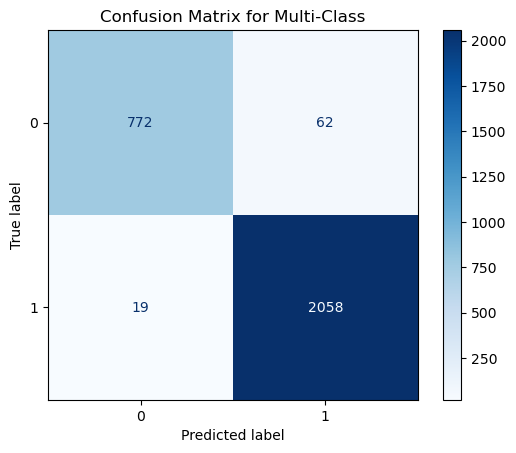

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_set_labels, [0 if i <= 0.5 else 1 for i in new_model.predict(test_set)])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_set_labels))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Multi-Class")
plt.show()


In [15]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(test_set_labels, [0 if i <= 0.5 else 1 for i in new_model.predict(test_set)])

recall = recall_score(test_set_labels, [0 if i <= 0.5 else 1 for i in new_model.predict(test_set)])

print(f'Precision: {precision}')
print(f'Recall: {recall}')

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Precision: 0.970754716981132
Recall: 0.9908521906596052


In [16]:
model.save('dataset2.keras')